# Capstone II: Craiglist Used Car Dataset
### Part 4: Model Development - Step I
Biman Mondal

May 23, 2025

Original Dataset .csv file downloaded from Kaggle:
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

After going through the data anlysis steps, I've determined that analysis become cumbersome if all the features are kept for modeling. Therefore, this notebook will perform all the cleaning and preprocessing of the original dataset and without halving the original dataset. 

# Table of Contents
* [Chapter 1](#chapter1)
    * [Section 1.1](#section_1_1)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
        * [Sub Section 2.1.1](#sub_section_2_1_1)
        * [Sub Section 2.1.2](#sub_section_2_1_2)
* [Chapter 3](#chapter3)
    * [Section 3.1](#section_3_1)
        * [Sub Section 3.1.1](#sub_section_3_1_1)
        * [Sub Section 3.1.2](#sub_section_3_1_2)
    * [Section 3.2](#section_3_2)
        * [Sub Section 3.2.1](#sub_section_3_2_1)

In [59]:
#!pip install fancyimpute

In [60]:
# Import numpy package
import numpy as np
# Import pandas package
import pandas as pd
# Import matplotlib package
import matplotlib.pyplot as plt
# Import the seaborn package
import seaborn as sns
# Import ydata-profiling package
#from ydata_profiling import ProfileReport
# Import missingno package
import missingno as msno
# Import datetime
import datetime as dt

In [61]:
veh = pd.read_csv('./data/vehicles.csv', header='infer',index_col='id')
#vehicles.set_index('id', inplace=True)

In [62]:
veh.head(5).T

id,7222695916,7218891961,7221797935,7222270760,7210384030
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN
fuel,NaN,NaN,NaN,NaN,NaN


#### Drop Unnecessary Feature Columns from Dataframe

In [63]:
print(f'The vehicle dataframe has {veh.shape[0]} rows and {veh.shape[1]} columns.')
# Drop all columns
drop_cols = ['url','region','region_url','size','VIN','paint_color','image_url','description','county','state','lat','long','posting_date']
veh = veh.drop(drop_cols,axis=1)
#vehicles = vehicles.drop('VIN',axis=1)


The vehicle dataframe has 426880 rows and 25 columns.


In [64]:
# Remove duplicates in the dataset
print(f"Dataframe rows = {veh.shape[0]}.")
veh = veh[veh.duplicated(subset=['price', 'year', 'manufacturer', 'model','odometer'])]
print(f"Dataframe rows after removing duplicates: {veh.shape[0]}.")

Dataframe rows = 426880.
Dataframe rows after removing duplicates: 181991.


In [65]:
print(f'The vehicle dataframe has {veh.shape[0]} rows and {veh.shape[1]} columns.')
veh.head(5).T

The vehicle dataframe has 181991 rows and 12 columns.


id,7218325704,7217788283,7217147606,7209027818,7216672204
price,0,0,0,0,24999
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN
fuel,NaN,NaN,NaN,NaN,NaN
odometer,NaN,NaN,NaN,NaN,NaN
title_status,NaN,NaN,NaN,NaN,NaN
transmission,NaN,NaN,NaN,NaN,NaN


In [66]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181991 entries, 7218325704 to 7301591129
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         181991 non-null  int64  
 1   year          181472 non-null  float64
 2   manufacturer  175042 non-null  object 
 3   model         180358 non-null  object 
 4   condition     105638 non-null  object 
 5   cylinders     92306 non-null   object 
 6   fuel          180641 non-null  object 
 7   odometer      179859 non-null  float64
 8   title_status  177882 non-null  object 
 9   transmission  180712 non-null  object 
 10  drive         120773 non-null  object 
 11  type          150658 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 18.1+ MB


In [67]:
### Remove rows which have NA for both manufacturer and model
vehicles = veh[veh[['manufacturer','model']].notna().all(axis=1)]

print(f'After removing NA rows, the vehicle dataframe has {vehicles.shape[0]} rows.')


After removing NA rows, the vehicle dataframe has 173424 rows.


#### Visualize Dataframe Missing Values

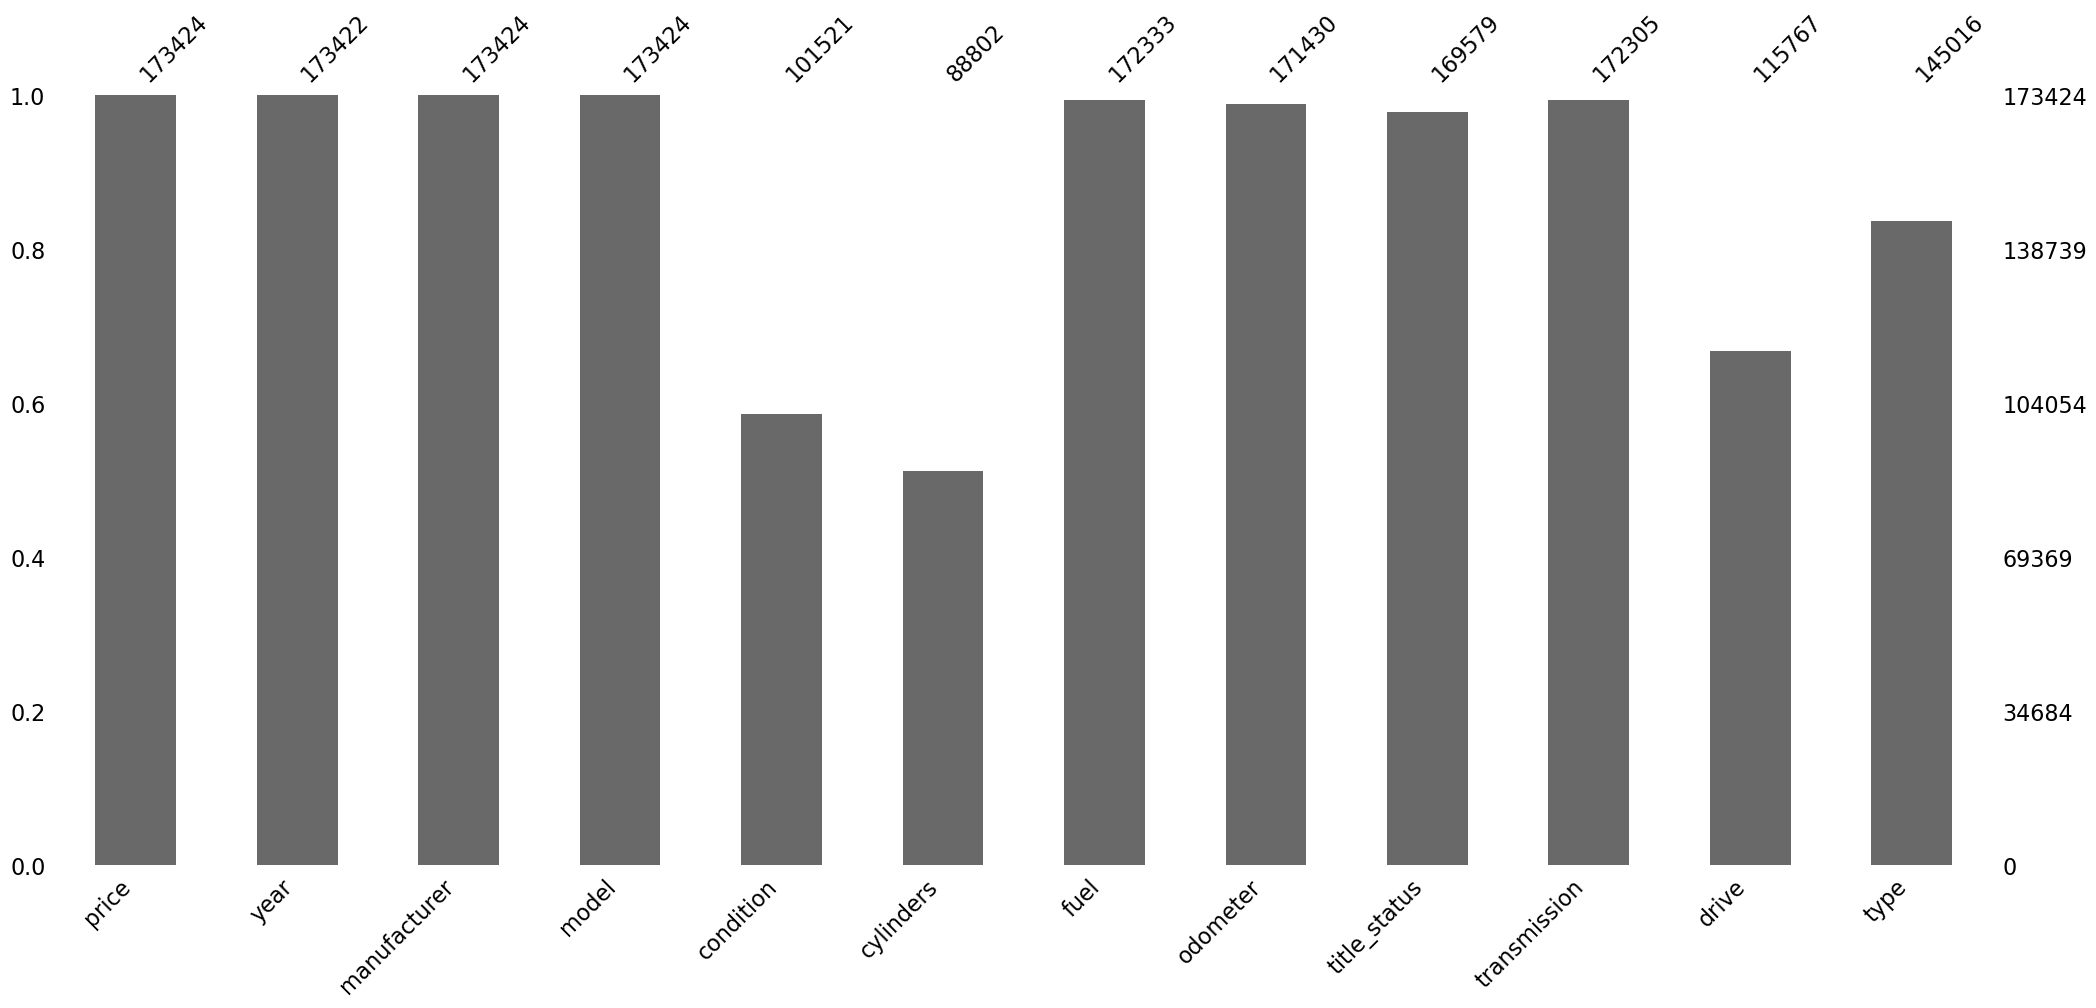

In [68]:
#vehicles.info()
msno.bar(vehicles)
plt.show()

In [69]:
# Print the total number of NA's
vehicles.isna().sum()
#print(vehicles_sub.loc[vehicles_sub['price']<1,['year','price','manufacturer','model']])

price               0
year                2
manufacturer        0
model               0
condition       71903
cylinders       84622
fuel             1091
odometer         1994
title_status     3845
transmission     1119
drive           57657
type            28408
dtype: int64

### Process Numerical Features

count     173424.000000
mean       21420.059161
std        15852.560409
min            0.000000
25%         8988.000000
50%        19999.000000
75%        31900.000000
max      1000000.000000
Name: price, dtype: float64


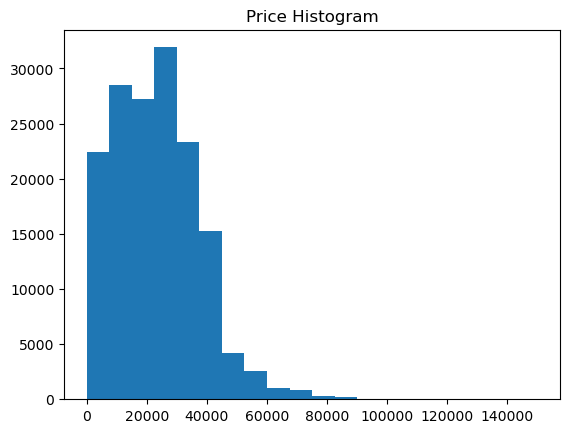

(157841, 12)


In [70]:
### Price
#vehicles = vehicles[vehicles['price']<100000]
print(vehicles['price'].describe())

# Only include prices above zero and below 15000
mask = ((vehicles['price']<=150000) & (vehicles['price']>1))
plt.hist(vehicles.loc[mask,'price'],bins=20)
plt.title('Price Histogram')
plt.show()

# Remove vehicle rows above $100k & with zero price
vehicles = vehicles[mask]
print(vehicles.shape)

In [71]:
### Year
vehicles = vehicles[vehicles['year'].notna()]
#vehicles_sub = vehicles[vehicles[['manufacturer','model']].notna().all(axis=1)]

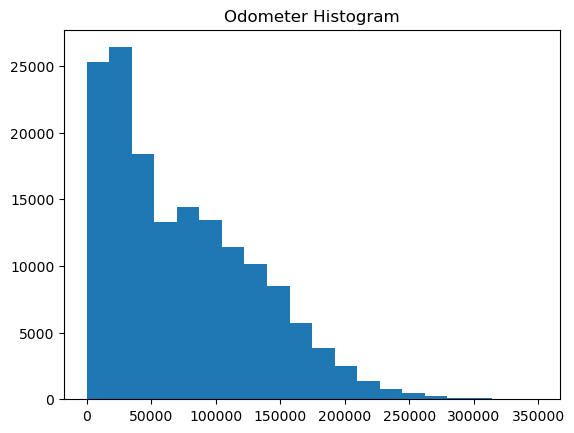

In [72]:
### Odometer
plt.hist(vehicles.loc[vehicles["odometer"]<350000,'odometer'],bins=20)
plt.title('Odometer Histogram')
plt.show()


In [73]:
# Limit odometer readings below 350k
vehicles = vehicles[vehicles["odometer"]<350000]

In [74]:
# Fill in odometer reading by looking up condition and year of vehicle
# and replacing the median for that category
median_per_group = vehicles[vehicles['odometer']!=0].groupby(['year','condition'])['odometer'].median()

def replace_zero(row):
    if row['odometer'] == 0 or np.isnan(row['odometer']):
        condition = row['condition'] if pd.notna(row['condition']) else 'good'
        key = (row['year'], condition)
        if key in median_per_group:
            return median_per_group[key]
        elif row['year'] :
            return 0
    else: 
        return row['odometer']
vehicles['odometer'] = vehicles.apply(replace_zero, axis=1)

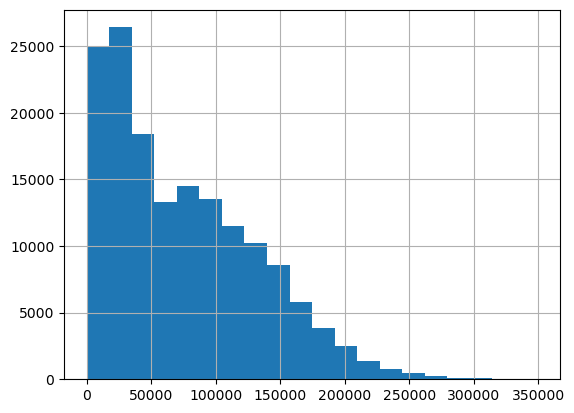

In [75]:
vehicles['odometer'].hist(bins=20)
plt.show()

In [76]:
### Cylinders
print(vehicles['cylinders'].unique())

# Drop "cylinders" to plot vehicle engine size
vehicles['cylinders'] = vehicles['cylinders'].str.replace(' cylinders', '', regex=False)


['8 cylinders' '6 cylinders' nan '4 cylinders' '5 cylinders'
 '10 cylinders' '3 cylinders' 'other' '12 cylinders']


In [77]:
# Replace 'other' in cylinders with nan
vehicles.loc[(vehicles['cylinders']=='other'),'cylinders'] = np.nan


In [78]:
# Convert cylinder to number
vehicles['cylinders'] = pd.to_numeric(vehicles['cylinders'], errors='coerce')
# Replace NAN's to median
vehicles['cylinders'] = vehicles['cylinders'].fillna(vehicles['cylinders'].median())
# Convert feature type to int
vehicles['cylinders'] = vehicles['cylinders'].astype('int')

count    156599.000000
mean          6.097133
std           1.093683
min           3.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: cylinders, dtype: float64
[ 8  6  4  5 10  3 12]


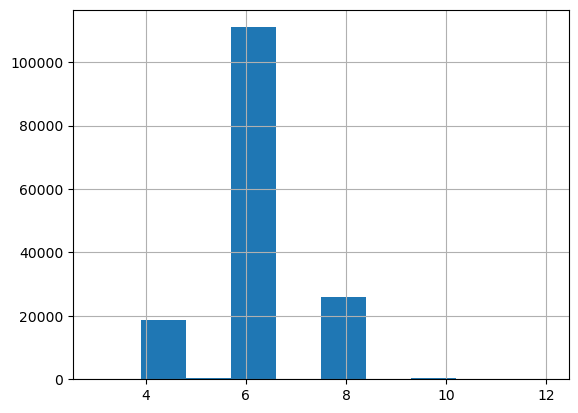

In [79]:
print(vehicles['cylinders'].describe())
print(vehicles['cylinders'].unique())
# Plot the histogram
vehicles['cylinders'].hist()
plt.show()

### Process Categorical Features

In [80]:
# Sum the total number of NA's
vehicles.isna().sum()

price               0
year                0
manufacturer        0
model               0
condition       60259
cylinders           0
fuel              779
odometer            0
title_status     3521
transmission      657
drive           53317
type            25445
dtype: int64

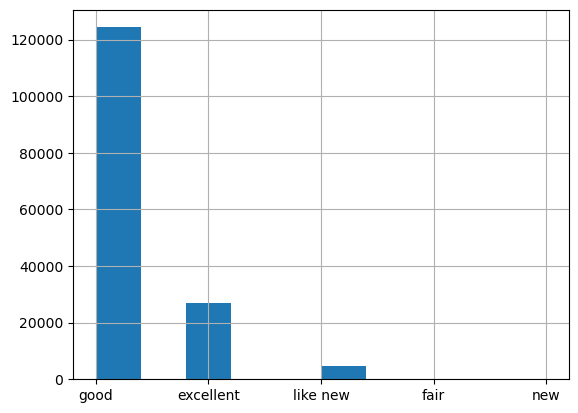

In [81]:
### Condition
# Drop salvage in condition
vehicles = vehicles[~vehicles['condition'].isin(['salvage'])]
# Replace NaN's with 
vehicles['condition'] = vehicles['condition'].fillna('good')
# Plot histogram
vehicles['condition'].hist()
plt.show()

['gas' 'other' 'diesel' nan 'electric' 'hybrid']


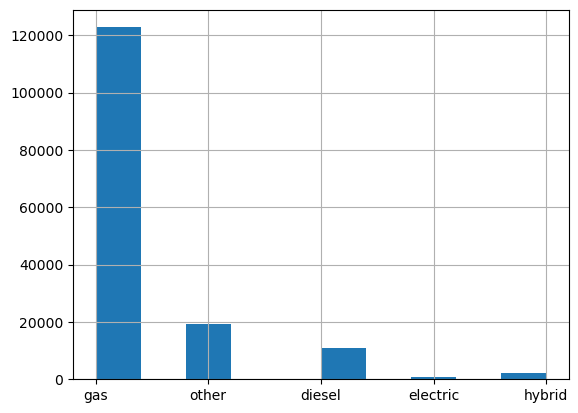

In [82]:
### Fuel
print(vehicles['fuel'].unique())
# Plot the histogram
vehicles['fuel'].hist()
plt.show()
# Assume fuel NA are gas, since most of the vehicles are gasoline engines
vehicles['fuel'] = vehicles['fuel'].fillna('gas')
# Combine other fuel type as gas
vehicles.loc[vehicles['fuel'].isin(['other']),'fuel']='gas'

In [83]:
## Title Status
print(vehicles['title_status'].unique())
# Drop vehicles with title with 'parts only' or 'salvage'
myfilt = ((vehicles['title_status'].isin(["salvage"])) | (vehicles['title_status'].isin(['parts only'])))
# Remove the rows with 'parts only' or 'salvage'
vehicles = vehicles.loc[~myfilt,:]
print(vehicles['title_status'].unique())


['clean' 'rebuilt' nan 'lien' 'salvage' 'missing' 'parts only']
['clean' 'rebuilt' nan 'lien' 'missing']


['clean' 'other']


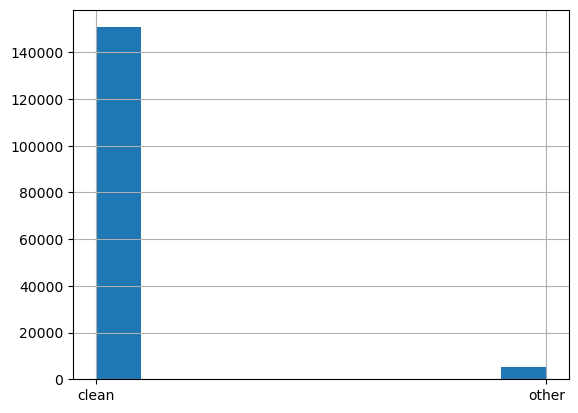

In [84]:
# Combine categories that are not 'clean' and label them as 'other'
vehicles.loc[vehicles['title_status'].isin(["missing",'rebuilt','lien',np.nan]),'title_status']='other'
print(vehicles['title_status'].unique())
vehicles['title_status'].hist()
plt.show()

['other' 'automatic' 'manual' nan]


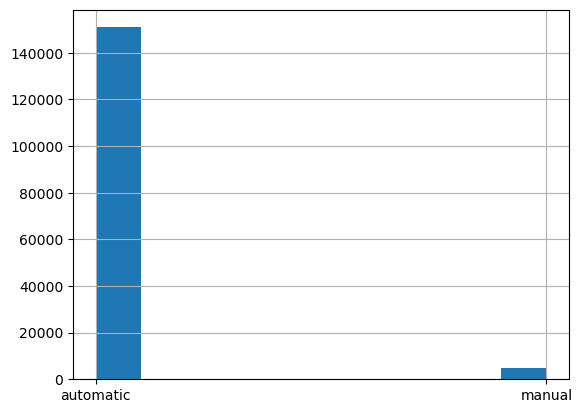

In [85]:
### Transmission
print(vehicles['transmission'].unique())
# Set the na and 'other' categories as 'automatic'
vehicles.loc[vehicles['transmission'].isin([np.nan,'other']),['transmission']] = 'automatic'
# Plot the histogram
vehicles['transmission'].hist()
plt.show()

[nan '4wd' 'fwd' 'rwd']


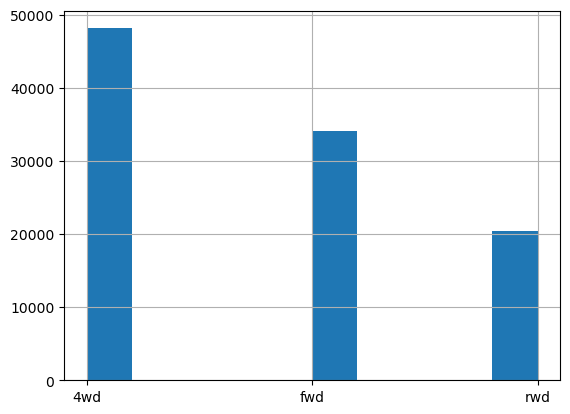

In [86]:
### Drive
print(vehicles['drive'].unique())
# Plot the histogram
vehicles['drive'].hist()
plt.show()

In [87]:
# Assign the nan in drive as front-wheel-drive
vehicles.loc[vehicles['drive'].isin([np.nan]),['drive']] = 'fwd'
#vehicles_sub.loc[vehicles_sub['drive'].isin([np.nan]),['manufacturer','model','drive']]

In [88]:
### Vehicles by Type
print(vehicles['type'].unique())

['pickup' 'other' 'sedan' nan 'SUV' 'hatchback' 'coupe' 'truck' 'wagon'
 'convertible' 'van' 'mini-van' 'offroad' 'bus']


In [89]:
# Remove the rows with 'bus' and offroad as type
vehicles = vehicles[~vehicles['type'].isin(['bus','offroad'])]
#vehicles_sub = vehicles_sub.loc[~(vehicles_sub['type']=='bus'),:]
print(vehicles['type'].unique())

['pickup' 'other' 'sedan' nan 'SUV' 'hatchback' 'coupe' 'truck' 'wagon'
 'convertible' 'van' 'mini-van']


In [90]:
# Combine truck and pickup categories
vehicles.loc[vehicles['type'].isin(['pickup']),'type'] = 'truck'
vehicles.loc[vehicles['type'].isin(['mini-van']),'type'] = 'van'
# Combine 'coupe', 'convertible', 'hatchback', 'wagon'
vehicles.loc[vehicles['type'].isin(['coupe','van','hatchback','convertible','wagon']),'type'] = 'other'


In [91]:
# Label the na values as sedan
vehicles.loc[vehicles['type'].isin([np.nan]),'type'] = 'sedan'


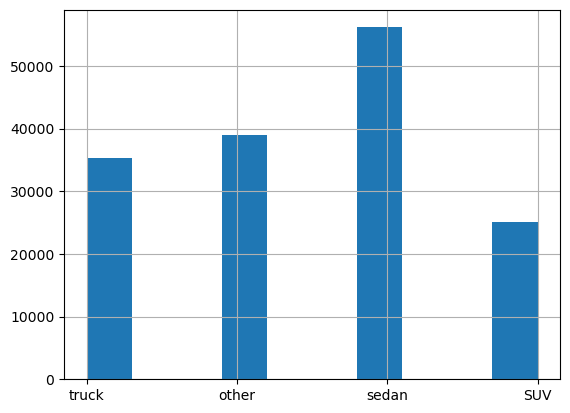

In [92]:
# Plot a histogram of the vehicle type
vehicles['type'].hist()
plt.show()

In [93]:
# Print the number of na values per column
vehicles.isna().sum()
# All the null values in the features have been eliminated

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
dtype: int64

In [94]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155670 entries, 7316788498 to 7301591129
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         155670 non-null  int64  
 1   year          155670 non-null  float64
 2   manufacturer  155670 non-null  object 
 3   model         155670 non-null  object 
 4   condition     155670 non-null  object 
 5   cylinders     155670 non-null  int32  
 6   fuel          155670 non-null  object 
 7   odometer      155670 non-null  float64
 8   title_status  155670 non-null  object 
 9   transmission  155670 non-null  object 
 10  drive         155670 non-null  object 
 11  type          155670 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 14.8+ MB


### Condense number of categories in Vehicle models
Since there are so many model categories, they should be condensed to simplify categorization.

Assign standard labels for the top 40 vehicle models including for f-150, f-250, silverado, and other.

In [95]:
print(f"There are {vehicles['model'].nunique()} unique models in the dataset!!")
print(vehicles['model'].value_counts().nlargest(20))
foo=vehicles['model'].value_counts()

There are 8744 unique models in the dataset!!
model
f-150                     2916
silverado 1500            1905
1500                      1604
2500                      1281
wrangler                  1074
silverado                  934
tacoma                     871
escape                     870
explorer                   840
3500                       751
grand cherokee             720
altima                     718
civic                      710
camry                      698
charger                    685
accord                     650
mustang                    643
silverado 2500hd           643
equinox                    613
1500 crew cab big horn     604
Name: count, dtype: int64


In [96]:
# Combine the f-150 models
vehicles.loc[(vehicles.model.str.contains("f150"))&(vehicles.manufacturer=='ford'),'model'] = 'f-150'
f150_pattern ="f-[150]."
#vehicles.loc[vehicles.model.str.contains(f150_pattern),'model'] = 'f-150'
#vehicles.loc[((vehicles.model.str.contains(f150_pattern))&(vehicles.manufacturer=='ford')),['manufacturer','model']]
vehicles.loc[((vehicles.model.str.contains(f150_pattern))&(vehicles.manufacturer=='ford')),'model']='f-150'

# Combine the f-250 model segment
vehicles.loc[vehicles.model.str.contains('f.250.'), 'model']
vehicles.loc[(vehicles.model.str.contains('.f*.250.')) & (vehicles.manufacturer=='ford'),'model'] = 'f-250'
vehicles.loc[vehicles.model.str.contains('f*.250.') & (vehicles.manufacturer=='ford'),'model'] = 'f-250'
vehicles.loc[vehicles.model.str.contains('f250') & (vehicles.manufacturer=='ford'),'model'] = 'f-250'

# Combine all f-350 model segments
vehicles.loc[(vehicles.model.str.contains('.f-350.')) & (vehicles.manufacturer=='ford'),'model'] = 'f-350'
vehicles.loc[(vehicles.model.str.contains('.350.')) & (vehicles.manufacturer=='ford'),'model'] = 'f-350'
vehicles.loc[(vehicles.model.str.contains('f350')) & (vehicles.manufacturer=='ford'),'model'] = 'f-350'

In [97]:
# Combine all the silverado 1500 
vehicles.loc[(vehicles.model.str.contains('.*silverado 1500.*')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 1500'
vehicles.loc[(vehicles.model.str.contains('1500')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 1500'
vehicles.loc[(vehicles.model.str.contains('silverado$')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 1500'
vehicles.loc[(vehicles.model.str.contains('.*1500.*')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 1500'

# Combine all the silverado 2500 
vehicles.loc[(vehicles.model.str.contains('.*silverado 2500.*')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 2500'
vehicles.loc[(vehicles.model.str.contains('2500')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 2500'
vehicles.loc[(vehicles.model.str.contains('.*silverado 3500.*')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 3500'


In [98]:
# Combine all ram 1500 
vehicles.loc[(vehicles.model.str.contains('.*1500.*')) & (~vehicles.model.str.contains('.*van.*')) & (vehicles.manufacturer=='ram'),'model'] = '1500'
# Combine all ram 2500
vehicles.loc[(vehicles.model.str.contains('.*2500.*')) & (~vehicles.model.str.contains('.*van.*'))& (vehicles.manufacturer=='ram'),'model'] = '2500'
# Combine all ram 3500
vehicles.loc[(vehicles.model.str.contains('.*3500.*')) & (~vehicles.model.str.contains('.*van.*'))& (vehicles.manufacturer=='ram'),'model']  = '3500'
#vehicles.loc[vehicles.model.str.contains('3500'), ['model','manufacturer']]

In [99]:
# Combine toyota tacoma models
vehicles.loc[vehicles.model.str.contains('tacoma'), 'model'] = 'tacoma'
# Combine toyota tundra models
vehicles.loc[vehicles.model.str.contains('tundra'), 'model'] = 'tundra'
vehicles.loc[vehicles.model.str.contains('.*camry.*'), 'model'] = 'camry'
vehicles.loc[vehicles.model.str.contains('.*corolla.*'), 'model'] = 'corolla'

In [100]:
# Other similar models
vehicles.loc[(vehicles.model.str.contains('.*wrangler.*')) & (vehicles.manufacturer=='jeep'),'model'] = 'wrangler'
vehicles.loc[vehicles.model.str.contains('.*accord.*'), 'model'] = 'accord'
vehicles.loc[vehicles.model.str.contains('.*civic.*'), 'model'] = 'civic'
vehicles.loc[vehicles.model.str.contains('.*escape.*'), 'model'] = 'escape'
vehicles.loc[vehicles.model.str.contains('.*altima.*'), 'model'] = 'altima'
vehicles.loc[vehicles.model.str.contains('.*explorer.*'), 'model'] = 'explorer'
vehicles.loc[vehicles.model.str.contains('.*cherokee.*'), 'model'] = 'cherokee'
vehicles.loc[vehicles.model.str.contains('.*mustang.*'), 'model'] = 'mustang'
vehicles.loc[vehicles.model.str.contains('.*fusion.*'), 'model'] = 'fusion'
vehicles.loc[vehicles.model.str.contains('.*cr-v.*'), 'model'] = 'cr-v'
vehicles.loc[vehicles.model.str.contains('.*focus.*'), 'model'] = 'focus'
vehicles.loc[vehicles.model.str.contains('.*outback.*'), 'model'] = 'outback'
vehicles.loc[vehicles.model.str.contains('.*impala.*'), 'model'] = 'impala'
vehicles.loc[vehicles.model.str.contains('.*malibu.*'), 'model'] = 'malibu'
vehicles.loc[vehicles.model.str.contains('.*rav4.*'), 'model'] = 'rav4'
vehicles.loc[vehicles.model.str.contains('.*corvette.*'), 'model'] = 'corvette'
vehicles.loc[vehicles.model.str.contains('.*charger.*'), 'model'] = 'charger'
vehicles.loc[vehicles.model.str.contains('.*grand caravan.*'), 'model'] = 'grand caravan' 
vehicles.loc[vehicles.model.str.contains('.*sierra 1500.*'), 'model'] = 'sierra 1500'
vehicles.loc[vehicles.model.str.contains('.*tahoe.*'), 'model'] = 'tahoe'
vehicles.loc[vehicles.model.str.contains('.*odyssey.*'), 'model'] = 'odyssey'
vehicles.loc[vehicles.model.str.contains('.*cruze.*'), 'model'] = 'cruze'
vehicles.loc[vehicles.model.str.contains('.*sonata.*'), 'model'] = 'sonata'
vehicles.loc[vehicles.model.str.contains('.*jetta.*'), 'model'] = 'jetta'
vehicles.loc[vehicles.model.str.contains('.*prius.*'), 'model'] = 'prius'
vehicles.loc[vehicles.model.str.contains('.*edge.*'), 'model'] = 'edge'
vehicles.loc[vehicles.model.str.contains('.*elantra.*'), 'model'] = 'elantra'
vehicles.loc[vehicles.model.str.contains('.*colorado.*'), 'model'] = 'colorado'


In [101]:
print(f'The vehicle dataframe has {vehicles.shape[0]} rows and {vehicles.shape[1]} columns.')

print(f"There are {vehicles['model'].nunique()} unique models in the dataset!!")
print(f"\nThe following are the ordered category of vehicles: ")
print(vehicles['model'].value_counts().nlargest(10))
print(vehicles['model'].value_counts().nsmallest(10))

The vehicle dataframe has 155670 rows and 12 columns.
There are 5974 unique models in the dataset!!

The following are the ordered category of vehicles: 
model
f-150             7147
silverado 1500    5647
1500              4669
wrangler          3740
f-250             3188
tacoma            2893
f-350             2530
sierra 1500       2396
2500              1990
civic             1885
Name: count, dtype: int64
model
lx-470                                                                                                 1
scion xa hatchback                                                                                     1
comet caliente                                                                                         1
firebird se                                                                                            1
town & country touring wheelchair van fr conversions - manual fold out ramp rear loading conversion    1
town & country touring wheelchair van vmi northstar -

In [102]:
ranked_models = vehicles['model'].value_counts()
print(ranked_models)
print(len(ranked_models))

model
f-150                    7147
silverado 1500           5647
1500                     4669
wrangler                 3740
f-250                    3188
                         ... 
kodiak 4500                 1
mirage g4 le sedan 4d       1
venza le awd                1
tilt master w4500           1
fj40 land cruiser           1
Name: count, Length: 5974, dtype: int64
5974


In [103]:
unique_models_names = vehicles['model'].unique()

In [104]:
# Create a list of the quantity of unique model counts
my_range = [1, 5, 10, 20, 30, 40, 50]
my_vals = []
for k in my_range:
    my_vals.append(len(ranked_models[ranked_models<=k]))

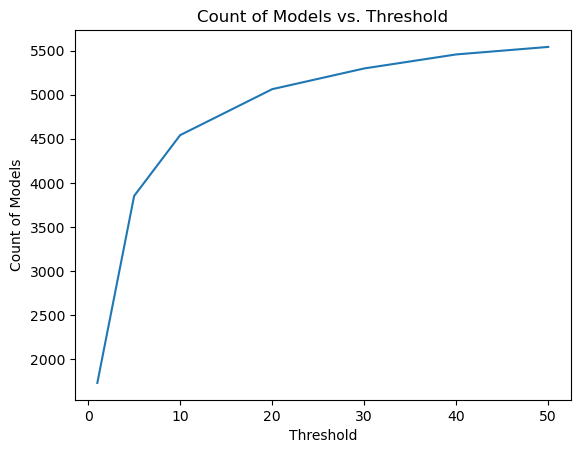

In [105]:
# The plot below shows that most of the listings have 10 unique model labels with misspellings or odd combination of model and description
plt.plot(my_range,my_vals)
plt.title('Count of Models vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Count of Models')
plt.show()

In [106]:
# Remove rows with less than 20 unique labels for car model
models_to_remove = ranked_models[ranked_models<=20]
#rows_to_remove.index[0]
indices_to_remove = []
for k in models_to_remove.index:
    vehicles = vehicles[~(vehicles['model'] == k)]
    #indices_to_remove.append(vehicles[(vehicles['model'] == k)].index.values)


In [115]:
vehicles['model'].nunique()

912

In [107]:
#vehicles[(vehicles['model'] == models_to_remove.index[0])].index.values
#vehicles[~(vehicles['model'] == models_to_remove.index[0])]


The vehicle dataframe has 134609 rows and 12 columns.


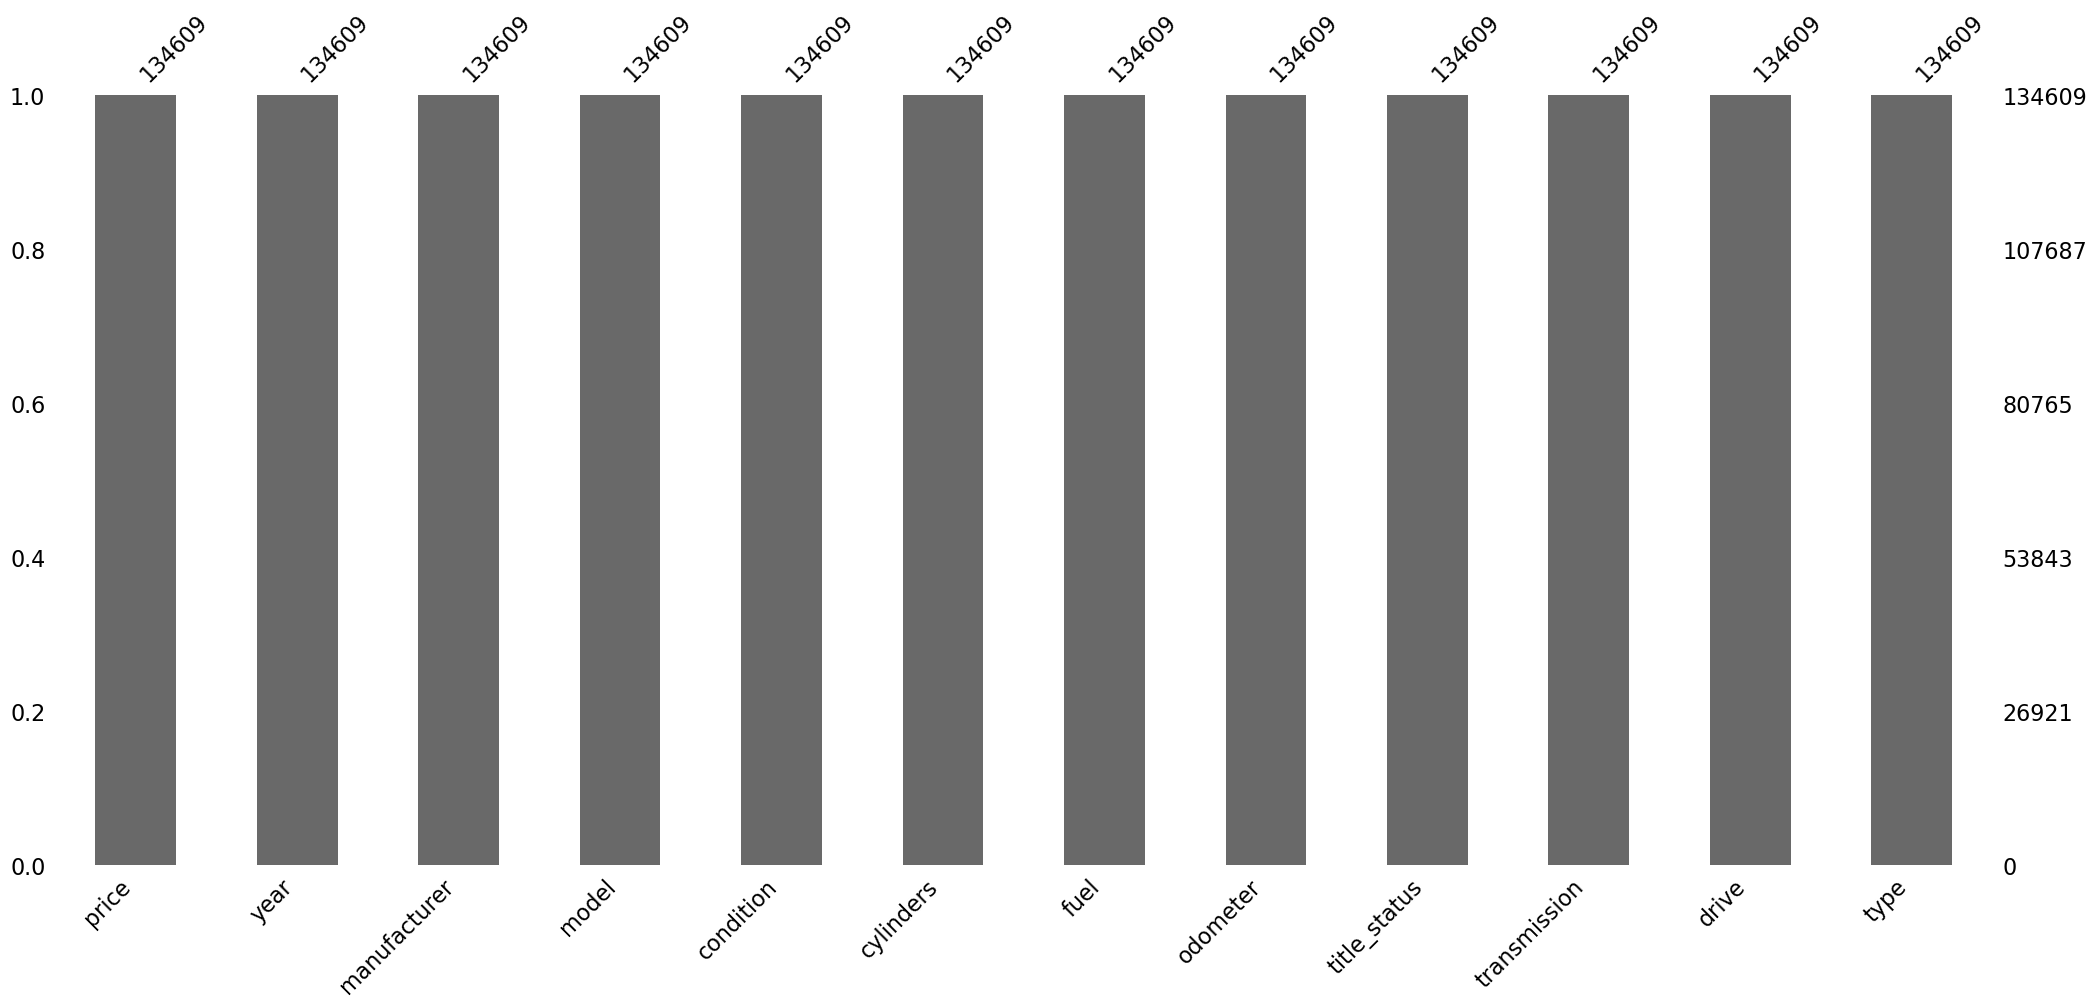

In [108]:
# Print datafrme shape
print(f'The vehicle dataframe has {vehicles.shape[0]} rows and {vehicles.shape[1]} columns.')
# Show Missing Data
msno.bar(vehicles)
plt.show()

### Encode Categorical Data


In [109]:
# Condition is categorical so it is suitable for single column mapping
cond_map = {'new': 1, 'like new': 2, 'excellent': 3, 'good': 4, 'fair': 5}
vehicles['condition_num'] = vehicles['condition'].map(cond_map)
# Drop the original condition object feature from the dataframe
vehicles = vehicles.drop('condition',axis=1)

In [110]:
# Limit the the dataframe to the top 50 models
#top_models = vehicles['model'].value_counts().nlargest(50)
#vehicles_sub = vehicles[vehicles['model'].isin(top_models.index)]

In [111]:
# Import category encoder
#import category_encoders as ce

In [112]:
#encoder = ce.OneHotEncoder(cols=['manufacturer','model','fuel','title_status','transmission','drive','type'], 
#                           use_cat_names=True,
#                            return_df=True)
#vehicle_transformed = encoder.fit_transform(vehicles_sub)
#vehicle_transformed.head()
#print(vehicle_transformed.shape)

#### Export Processed Dataframe

In [116]:
# Write the processed vehicle data to .csv file
vehicles.to_csv('./data/vehicles_processed.csv')

In [114]:
### Output random sample dataframe subset
foo = vehicles[['price','year','model','manufacturer']].sample(10000)
foo.head()

# Write the processed vehicle data to .csv file
foo.to_csv('./data/sample_vehicle_dataset.csv')